## Otsu's 二值化（大津算法）

#### 二值化是什么？
二值化操作：目的是将图像中的像素点根据一个阈值（threshold）分为两类(将图片的所有像素值要么变成0要么变成1)，一类是前景（通常为白色），另一类是背景（通常为黑色）。  
Otsu's 二值化（大津算法）：计算找出合适的阈值d  

### 实验1. 造一个数据  
做图像处理必备技能就是人工制造一个纯净的图片检验算法正确性  

Text(0.5, 0, 'raw img')

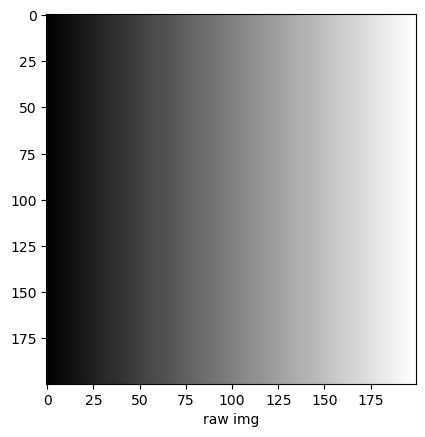

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

######我们先制造一个200x200的图片用于二值化实验#######
def get_test_img():
    img_mat = np.zeros((200,200), dtype=np.uint8) # 若不设成整数，opencv会将大于1的浮点数全显示成白色
    for row in range(200):
        for col in range(200):
            img_mat[row][col] = col

    return img_mat

img_mat = get_test_img()
plt.imshow(img_mat, cmap='gray')
plt.xlabel("raw img")

Text(0.5, 0, 'binary img')

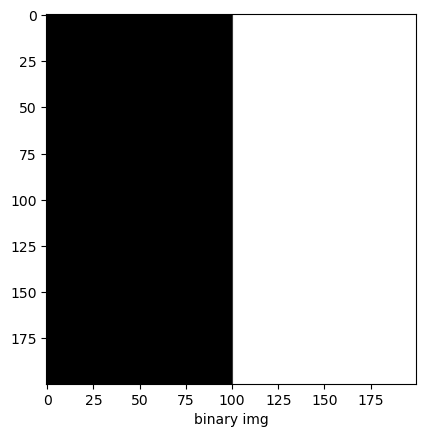

In [8]:
######手工设置阈值进行二值化实验######
img_mat[img_mat<=100]=0
img_mat[img_mat>100]=1
plt.imshow(img_mat,cmap='gray')# 显示图片
plt.xlabel("binary img")

### Otsu's 二值化（大津算法）流程  
1. 统计各个像素值出现次数，得到像素值频数表  
2. 遍历各种阈值d（0-255）：  
根据当前阈值将所有像素分为两类（>=d为A类，<d为B类）；  
计算各自类内像素值的方差SA、SB，各自类的像素值之和IA、IB；  
计算方差的加权和 S = IA * SA + IB * SB
3. 使S最小的那个阈值d即为最优阈值
4. 遍历所有像素点，像素值大于等于阈值d赋值为1，像素值小于阈值d赋值为0

### 实验二：otsu二值化实验

99.0


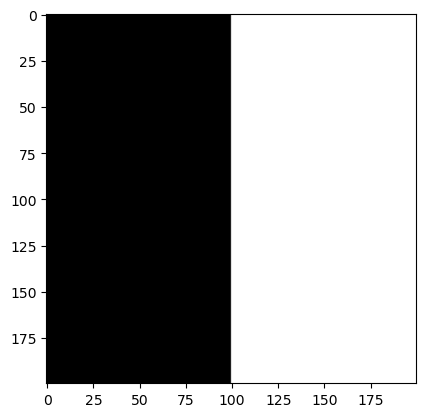

In [9]:
img_mat = get_test_img()
img_mat = img_mat.astype(np.uint8)
# 调用cv2中的otsu库
threshold, img_mat = cv2.threshold(
    img_mat, 
    thresh=0,  # 当像素值大于这个阈值时，会被设为 maxval；否则，会被设为 0
    maxval=255,  # 当像素值超过阈值后，它们将被设置为 maxval
    type=cv2.THRESH_BINARY+cv2.THRESH_OTSU
)# cv2.THRESH_OTSU是一个自动阈值算法。
# 当你将它与另一种类型（如 THRESH_BINARY）相加时，OpenCV 会忽略你手动指定的 thresh 值，
# 并使用大津法自动计算出一个最佳阈值，以使得图像的前景和背景之间的方差最大化。
print(threshold)
plt.imshow(img_mat, cmap='gray')

##### 从零实现

Otsu's threshold: 100


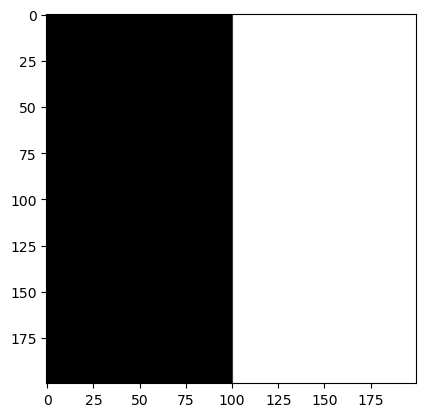

In [15]:
import numpy as np
img_mat = get_test_img()
img_mat = img_mat.astype(np.uint8)

def otsu(img):
    img_vector = img.flatten()
    pixel_num = np.zeros(256)
    for pixel_value in img_vector:
        pixel_num[pixel_value] += 1
    
    min_S = np.inf
    best_threshold = 0
    for d in range(256):
        # 计算前景和背景的像素数
        A_num = np.sum(pixel_num[:d])
        B_num = np.sum(pixel_num[d:])
        A_mean = np.sum(np.arange(d) * pixel_num[:d]) / A_num if A_num > 0 else 0
        B_mean = np.sum(np.arange(d, 256) * pixel_num[d:]) / B_num if B_num > 0 else 0
        variance_A = np.sum((np.arange(d) - A_mean) ** 2 * pixel_num[:d]) / A_num if A_num > 0 else 0
        variance_B = np.sum((np.arange(d, 256) - B_mean) ** 2 * pixel_num[d:]) / B_num if B_num > 0 else 0
        S = variance_A * A_num + variance_B * B_num
        if S < min_S:
            min_S = S
            best_threshold = d
    return best_threshold

otsu_threshold = otsu(img_mat)
print("Otsu's threshold:", otsu_threshold)
# 二值化处理
img_mat[img_mat <= otsu_threshold] = 0
img_mat[img_mat > otsu_threshold] = 1
plt.imshow(img_mat, cmap='gray')

### 实验三：真实图像二值化处理

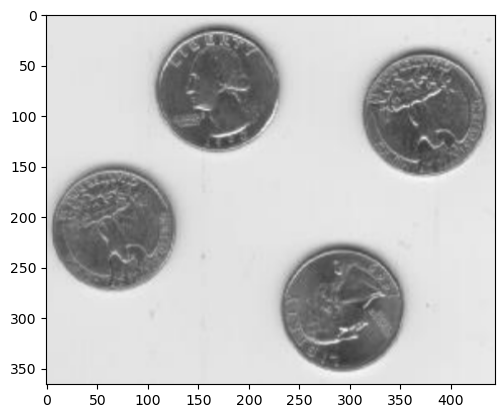

In [19]:
# 原始图片
raw_img = cv2.imread('./eight.png')
plt.imshow(raw_img)

Otsu's threshold for eight.png: 166


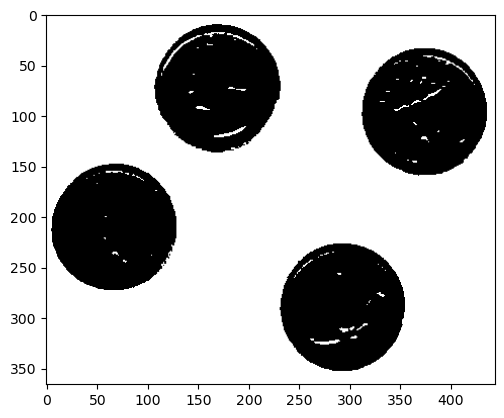

In [18]:
img = cv2.imread('./eight.png', cv2.IMREAD_GRAYSCALE) # IMREAD_GRAYSCALE:图像将被加载为单通道的 NumPy 数组
otsu_threshold = otsu(img)
print("Otsu's threshold for eight.png:", otsu_threshold)
# 二值化处理
img[img <= otsu_threshold] = 0
img[img > otsu_threshold] = 1
plt.imshow(img, cmap='gray')
